In [1]:
import os
# import drjit
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy


In [2]:
# common parameters
model_parameters = {}
jammer_parameters = {}
model_parameters["perfect_csi"] = False
model_parameters["num_ut"] = 2
model_parameters["num_ut_ant"] = 2
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(-3)
# model_parameters["jammer_mitigation"] = "pos"
# model_parameters["jammer_mitigation_dimensionality"] = 1
model_parameters["num_silent_pilot_symbols"] = 4
model_parameters["jammer_parameters"] = jammer_parameters

sim.BATCH_SIZE = 8
# sim.MAX_MC_ITER = 200
sim.MAX_MC_ITER = 30

def experiment(title):
    ber_plots.reset()
    # name, mash, jammer_present, jammer_mitigation
    parameters = [
        ("No Jammer", False, False, None),
        ("No Jammer, MASH", True, False, None),
        ("Jammer", False, True, None),
        ("Jammer, MASH", True, True, None),
        ("Jammer mitigated", False, True, "pos"),
        ("Jammer mitigated, MASH", True, True, "pos"),
    ]
    for name, mash, jammer_present, jammer_mitigation in parameters:
        model = Model(**{**model_parameters, "mash": mash,
                         "jammer_present": jammer_present,
                         "jammer_mitigation": jammer_mitigation})
        simulate_model(model, name)
    ber_plots.title = title
    ber_plots()

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 2.3052e-02 | 1.0000e+00 |       33992 |     1474560 |          240 |         240 |         3.2 |reached max iter       
   -3.667 | 9.3859e-03 | 1.0000e+00 |       13840 |     1474560 |          240 |         240 |         0.6 |reached max iter       
   -2.333 | 2.9270e-03 | 1.0000e+00 |        4316 |     1474560 |          240 |         240 |         0.7 |reached max iter       
     -1.0 | 6.8766e-04 | 9.5000e-01 |        1014 |     1474560 |          228 |         240 |         0.7 |reached max iter       
    0.333 | 1.1190e-04 | 4.0000e-01 |         165 |     1474560 |           96 |         240 |         0.7 |reached max iter       
    1.667 | 1.5598e-05 | 8.3333e-02 |          23 |     1474560 |           20 |     

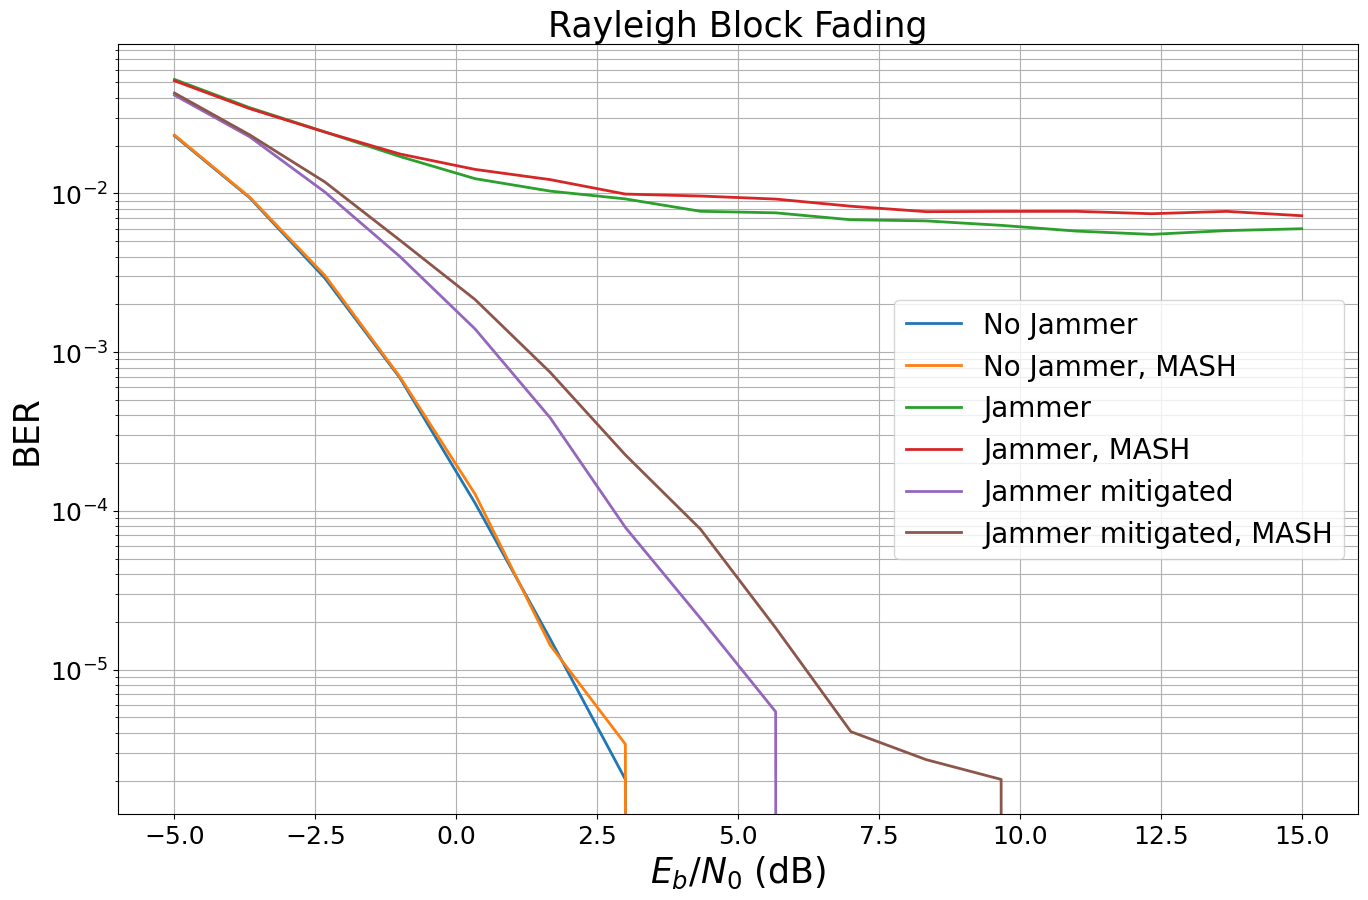

In [3]:
model_parameters["scenario"] = "rayleigh"
experiment("Rayleigh Block Fading")

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 1.0046e-01 | 1.0000e+00 |      148136 |     1474560 |          240 |         240 |         8.4 |reached max iter       
   -3.667 | 7.0234e-02 | 1.0000e+00 |      103564 |     1474560 |          240 |         240 |         1.0 |reached max iter       
   -2.333 | 5.3352e-02 | 1.0000e+00 |       78671 |     1474560 |          240 |         240 |         1.1 |reached max iter       
     -1.0 | 4.2938e-02 | 1.0000e+00 |       63314 |     1474560 |          240 |         240 |         1.1 |reached max iter       
    0.333 | 2.8421e-02 | 9.9583e-01 |       41908 |     1474560 |          239 |         240 |         1.0 |reached max iter       
    1.667 | 2.9109e-02 | 9.3333e-01 |       42923 |     1474560 |          224 |     

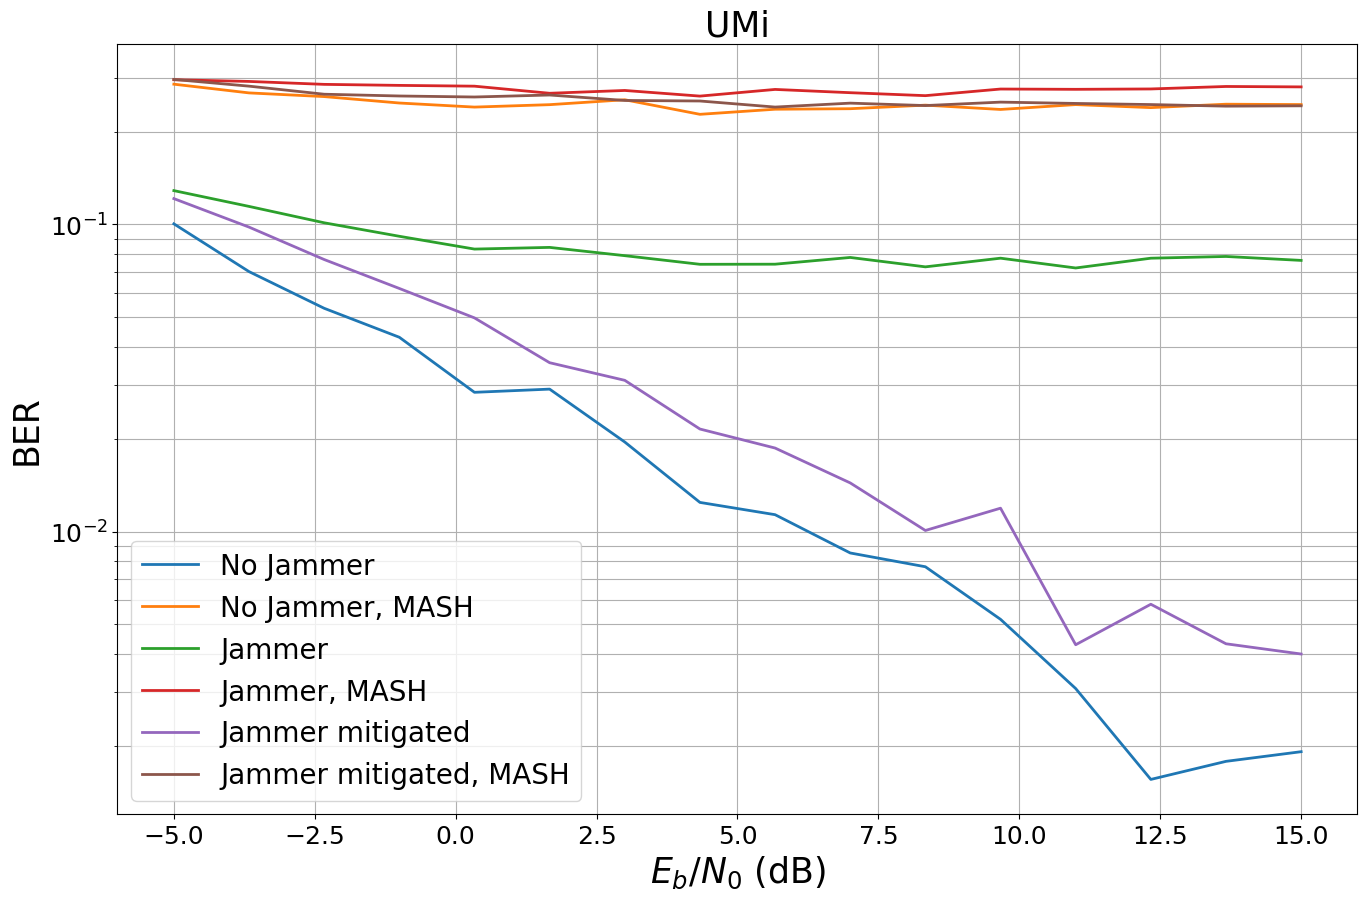

In [4]:
model_parameters["scenario"] = "umi"
experiment("UMi")